Note: Some installations were made for this project. The latest verion of the environment.yaml file is attached.

Data Source:
1. farmersMaarkects.csv: https://data.world/rebeccaclay/national-farmers-market-list
2. counties.geojson: https://gist.github.com/sdwfrost/d1c73f91dd9d175998ed166eb216994a

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('farmersMarkets.csv')
df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,Y,N,Y,N,N,6/28/2016 12:10:09 PM
1,1011871,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,Y,N,N,4/9/2016 8:05:17 PM
2,1011878,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,...,N,N,Y,N,N,N,N,N,N,7/15/2016 7:20:33 PM
3,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
4,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,N,Y,Y,N,N,N,N,N,N,6/5/2014 2:40:25 PM
8651,1000778,Zimmerman Farmers Market,http://www.pzfarmersmarket.org,princeton-zimerman farmers market,NaN,NaN,NaN,"Lions Park, Main Street",Zimmerman,Sherburne,...,N,N,Y,N,Y,N,N,N,N,6/27/2016 3:44:36 PM
8652,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,Y,N,Y,N,N,Y,N,N,N,7/9/2016 5:00:07 PM
8653,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


## Data Description

In [2]:
df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

Column Descriptions to understand:

1. Credit: This column likely indicates whether the farmers' market or specific vendors accept credit cards as a form of payment. It's a common payment method, making markets accessible to those who prefer not to carry cash.
2. WIC: Stands for the Women, Infants, and Children program. This federal assistance program provides nutritional support to low-income pregnant women, breastfeeding mothers, and children under the age of five. A 'True' value in this column suggests that the market accepts vouchers from the WIC program.
3. WICcash: This is likely related to the WIC Cash Value Vouchers (CVV), which are provided to WIC participants to purchase fruits, vegetables, and other specific food items. Markets that accept these vouchers are directly supporting nutritional choices for low-income families.
4. SFMNP: Stands for the Senior Farmers' Market Nutrition Program. This program grants vouchers to low-income seniors that can be used to purchase fresh produce at farmers' markets, roadside stands, and community-supported agriculture programs. A 'True' value indicates acceptance of these vouchers.
5. SNAP: Refers to the Supplemental Nutrition Assistance Program, formerly known as food stamps. Markets that accept SNAP benefits typically use Electronic Benefit Transfer (EBT) cards that allow users to purchase food items, including fresh produce and other goods sold at farmers' markets.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FMID           8655 non-null   int64  
 1   MarketName     8655 non-null   object 
 2   Website        5202 non-null   object 
 3   Facebook       3795 non-null   object 
 4   Twitter        996 non-null    object 
 5   Youtube        161 non-null    object 
 6   OtherMedia     636 non-null    object 
 7   street         8372 non-null   object 
 8   city           8615 non-null   object 
 9   County         8118 non-null   object 
 10  State          8655 non-null   object 
 11  zip            7714 non-null   object 
 12  Season1Date    5386 non-null   object 
 13  Season1Time    5519 non-null   object 
 14  Season2Date    429 non-null    object 
 15  Season2Time    414 non-null    object 
 16  Season3Date    78 non-null     object 
 17  Season3Time    74 non-null     object 
 18  Season4D

### Distinct values for each column

We can explore the data by listing what distinct values are held within each relevant column, excluding those columns that are primarily for temporal data, geographical coordinates, or other specific uses that might not need categorization or might not be relevant for this type of data exploration.

In [4]:
product_columns = ['Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
                   'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
                   'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans', 'Fruits',
                   'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu', 'WildHarvested']

for column in product_columns:
    # Get unique values in each column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Organic': ['Y' '-' 'N']
Unique values in 'Bakedgoods': ['Y' nan 'N']
Unique values in 'Cheese': ['Y' 'N' nan]
Unique values in 'Crafts': ['Y' 'N' nan]
Unique values in 'Flowers': ['Y' nan 'N']
Unique values in 'Eggs': ['Y' nan 'N']
Unique values in 'Seafood': ['N' nan 'Y']
Unique values in 'Herbs': ['Y' nan 'N']
Unique values in 'Vegetables': ['Y' nan 'N']
Unique values in 'Honey': ['Y' nan 'N']
Unique values in 'Jams': ['Y' nan 'N']
Unique values in 'Maple': ['Y' nan 'N']
Unique values in 'Meat': ['Y' nan 'N']
Unique values in 'Nursery': ['N' nan 'Y']
Unique values in 'Nuts': ['N' nan 'Y']
Unique values in 'Plants': ['Y' 'N' nan]
Unique values in 'Poultry': ['Y' 'N' nan]
Unique values in 'Prepared': ['Y' 'N' nan]
Unique values in 'Soap': ['Y' 'N' nan]
Unique values in 'Trees': ['Y' 'N' nan]
Unique values in 'Wine': ['N' nan 'Y']
Unique values in 'Coffee': ['Y' 'N' nan]
Unique values in 'Beans': ['Y' 'N' nan]
Unique values in 'Fruits': ['Y' nan 'N']
Unique values in '

## Data Cleaning

### Find the number of null values in each column

In [5]:
# Print the number of null values in each column
print(df.isnull().sum())

FMID                0
MarketName          0
Website          3453
Facebook         4860
Twitter          7659
Youtube          8494
OtherMedia       8019
street            283
city               40
County            537
State               0
zip               941
Season1Date      3269
Season1Time      3136
Season2Date      8226
Season2Time      8241
Season3Date      8577
Season3Time      8581
Season4Date      8648
Season4Time      8648
x                  29
y                  29
Location         5733
Credit              0
WIC                 0
WICcash             0
SFMNP               0
SNAP                0
Organic             0
Bakedgoods       3020
Cheese           3020
Crafts           3020
Flowers          3020
Eggs             3020
Seafood          3020
Herbs            3020
Vegetables       3020
Honey            3020
Jams             3020
Maple            3020
Meat             3020
Nursery          3020
Nuts             3020
Plants           3020
Poultry          3020
Prepared  

### Remove rows with missing or NaN data in the x or y columns

In [6]:
df[['x', 'y']].isnull().sum()

x    29
y    29
dtype: int64

In [7]:
df.dropna(subset=['x', 'y'], inplace=True)

In [8]:
df[['x', 'y']].isnull().sum()

x    0
y    0
dtype: int64

### Change NaN values to 'N' in specified columns

In [9]:
# Replace '-' with 'N' since '-' does not provide any meaningful information
df[product_columns] = df[product_columns].replace('-', 'N')

# Now fill NaN values with the most common value in each column
for column in product_columns:
    # Get the most common value (the mode) for the column
    most_common = df[column].mode()[0]  # mode() returns a Series, [0] gets the most common element
    df[column] = df[column].fillna(most_common)

# Check that there are no more missing values in these columns
print(df[product_columns].isnull().sum())

Organic          0
Bakedgoods       0
Cheese           0
Crafts           0
Flowers          0
Eggs             0
Seafood          0
Herbs            0
Vegetables       0
Honey            0
Jams             0
Maple            0
Meat             0
Nursery          0
Nuts             0
Plants           0
Poultry          0
Prepared         0
Soap             0
Trees            0
Wine             0
Coffee           0
Beans            0
Fruits           0
Grains           0
Juices           0
Mushrooms        0
PetFood          0
Tofu             0
WildHarvested    0
dtype: int64


### Standardize the format for the Season1Date, Season2Date, Season3Date, and Season4Date columns

In [10]:
from datetime import datetime

# Function to check if the date is in the correct format
def check_date_format(date_str):
    try:
        start_date, end_date = date_str.split(' to ')
        datetime.strptime(start_date.strip(), '%m/%d/%Y')
        datetime.strptime(end_date.strip(), '%m/%d/%Y')
        return True  # The format is correct
    except ValueError:
        return False  # The format is incorrect
    except AttributeError:
        return False  # Handles None or NaN cases

def correct_date_format(date_str):
    try:
        # Attempt to parse the date as it is
        start_date, end_date = date_str.split(' to ')
        datetime.strptime(start_date.strip(), '%m/%d/%Y')
        datetime.strptime(end_date.strip(), '%m/%d/%Y')
        return date_str  # Return the original string if it's correct
    except:
        # Attempt to correct common formatting errors
        try:
            start_date, end_date = date_str.split(' to ')
            start_date = datetime.strptime(start_date.strip(), '%B %d, %Y').strftime('%m/%d/%Y')
            end_date = datetime.strptime(end_date.strip(), '%B %d, %Y').strftime('%m/%d/%Y')
            return f"{start_date} to {end_date}"
        except Exception as e:
            return None  # Return None if the date cannot be corrected
        
# Columns to check
season_columns = ['Season1Date', 'Season2Date', 'Season3Date', 'Season4Date']

# Apply corrections
for column in ['Season1Date', 'Season2Date', 'Season3Date', 'Season4Date']:
    df[column] = df[column].apply(lambda x: correct_date_format(x) if pd.notna(x) else x)

# Dictionary to hold indices of rows with incorrect formats for each column
incorrect_format_indices = {col: [] for col in season_columns}

# Check each column for formatting issues
for column in season_columns:
    for index, value in df[column].dropna().items():  # Using .items() instead of .iteritems()
        if not check_date_format(value):
            incorrect_format_indices[column].append(index)

# Print or process the indices of incorrect formats
for column, indices in incorrect_format_indices.items():
    if indices:
        print(f"Incorrect format in {column} at rows: {indices}")
    else:
        print(f"All dates in {column} are correctly formatted.")

All dates in Season1Date are correctly formatted.
All dates in Season2Date are correctly formatted.
All dates in Season3Date are correctly formatted.
All dates in Season4Date are correctly formatted.


### Standardize the format for the updateTime column

In [11]:
# Ensure updateTime is a string
df['updateTime'] = df['updateTime'].astype(str)

# Convert to datetime
df['updateTime'] = pd.to_datetime(df['updateTime'], errors='coerce')

# Standardize to desired format
df['updateTime'] = df['updateTime'].dt.strftime('%Y-%m-%d')

# Cleaned DataFrame

In [12]:
df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,Y,N,Y,N,N,2016-06-28
1,1011871,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,Y,N,N,2016-04-09
2,1011878,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,...,N,N,Y,N,N,N,N,N,N,2016-07-15
3,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,N,N,Y,N,N,N,N,N,N,2013-01-01
4,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,2014-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,N,Y,Y,N,N,N,N,N,N,2014-06-05
8651,1000778,Zimmerman Farmers Market,http://www.pzfarmersmarket.org,princeton-zimerman farmers market,NaN,NaN,NaN,"Lions Park, Main Street",Zimmerman,Sherburne,...,N,N,Y,N,Y,N,N,N,N,2016-06-27
8652,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,Y,N,Y,N,N,Y,N,N,N,2016-07-09
8653,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,N,N,Y,N,N,N,N,N,N,2009-01-01


## Reading County Data

In [13]:
import geopandas as gpd

gdf_main = gpd.read_file('counties.geojson')

# Project the GeoDataFrame to a suitable projection; EPSG:2163 is a US National Atlas Equal Area
gdf_main = gdf_main.to_crs(epsg=2163)

gdf_main

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-1953017.324 -537161.383, -1948272.7..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((2309716.652 112376.760, 2310533.730 ..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-336456.005 -358823.311, -279839.837..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((1900974.376 -696969.594, 1903752.599..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-193797.074 -941763.581, -182139.063..."
...,...,...,...,...,...,...,...,...,...,...
3215,29,163,00758536,0500000US29163,29163,Pike,06,1736428536,36976453,"POLYGON ((732476.966 -579078.539, 754522.015 -..."
3216,72,001,01804480,0500000US72001,72001,Adjuntas,13,172725728,1051790,"POLYGON ((3505871.094 -2300795.595, 3507349.51..."
3217,19,079,00465228,0500000US19079,19079,Hamilton,06,1493777024,1965341,"POLYGON ((493315.572 -253329.703, 531854.480 -..."
3218,19,027,00465203,0500000US19027,19027,Carroll,06,1474835092,2145349,"POLYGON ((404137.492 -298057.271, 423246.987 -..."


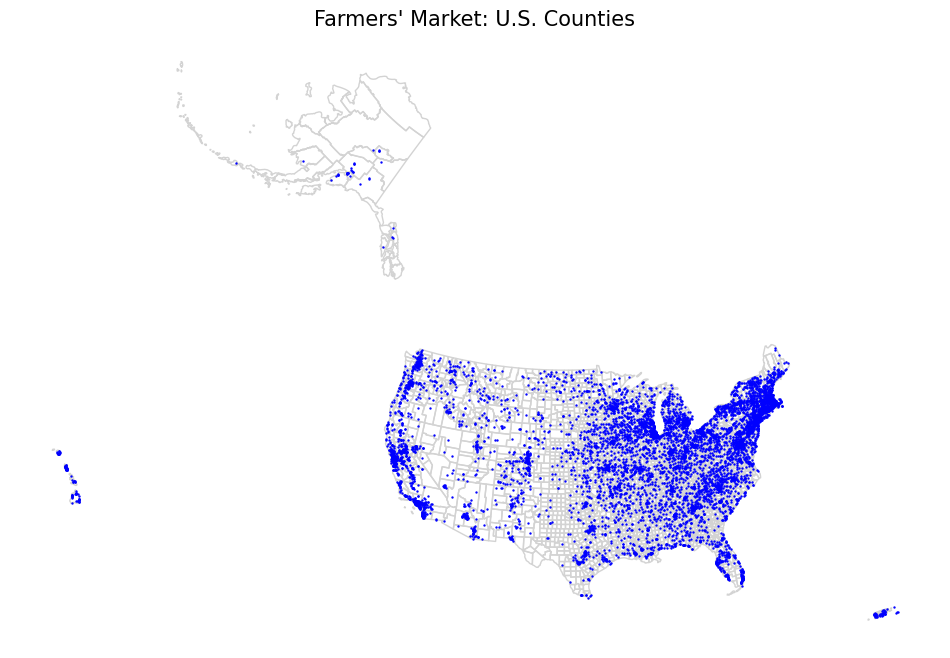

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert df to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, geometry=[Point(xy) for xy in zip(df.x, df.y)],
    crs='EPSG:4326'  # assuming your points are in WGS84 latitude/longitude
).to_crs(epsg=2163)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_main.plot(ax=ax, color='none', edgecolor='lightgrey')  # Plot the base map
gdf_points.plot(ax=ax, color='blue', markersize=0.5)  # Plot the points on the map

# Remove axes for a clean look
ax.set_axis_off()

# Set title
ax.set_title("Farmers' Market: U.S. Counties", fontsize=15)

plt.show()

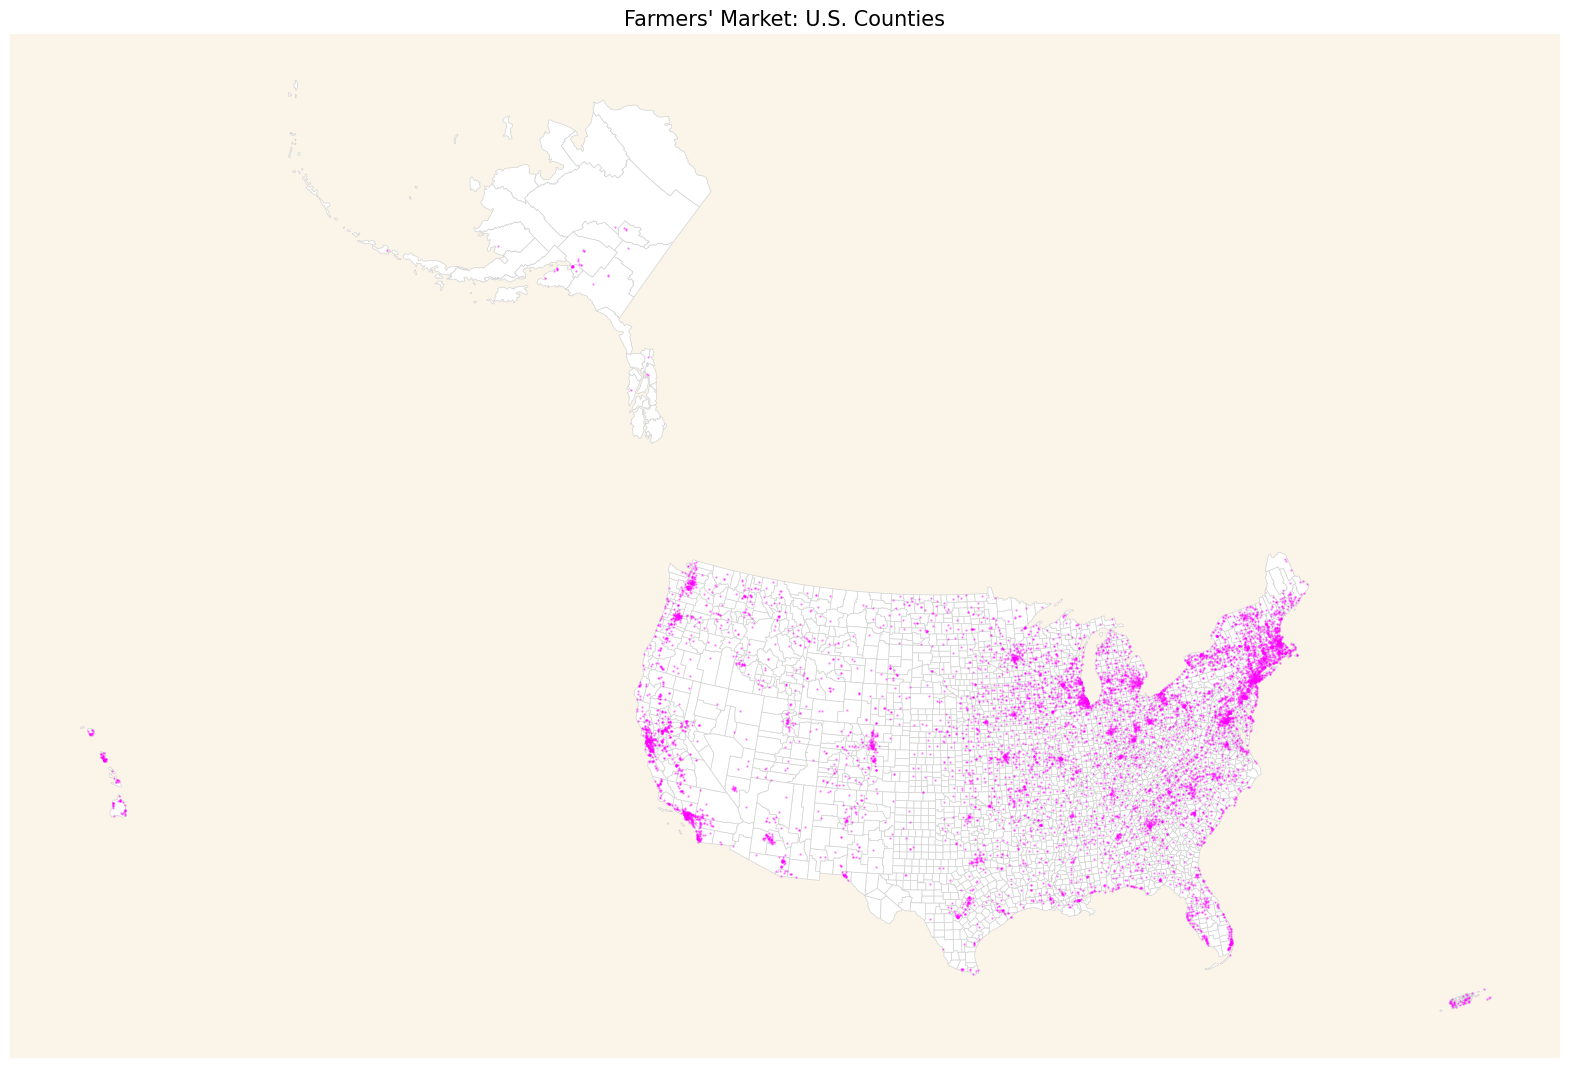

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.patches import Rectangle


# Convert df to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, geometry=[Point(xy) for xy in zip(df.x, df.y)],
    crs='EPSG:4326'  # assuming your points are in WGS84 latitude/longitude
).to_crs(epsg=2163)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Add background color
background_color = '#FAF4E9'
ax.add_patch(Rectangle((0, 0), 1, 1, color=background_color, transform=ax.transAxes, zorder=-1))

gdf_main.plot(ax=ax, color='white', edgecolor='lightgrey', linewidth=0.5)  # Plot the base map
gdf_points.plot(ax=ax, color='magenta', markersize=0.5, alpha = 0.4)  # Plot the points on the map

# Remove axes for a clean look
ax.set_axis_off()

# Set title
ax.set_title("Farmers' Market: U.S. Counties", fontsize=15)

plt.show()

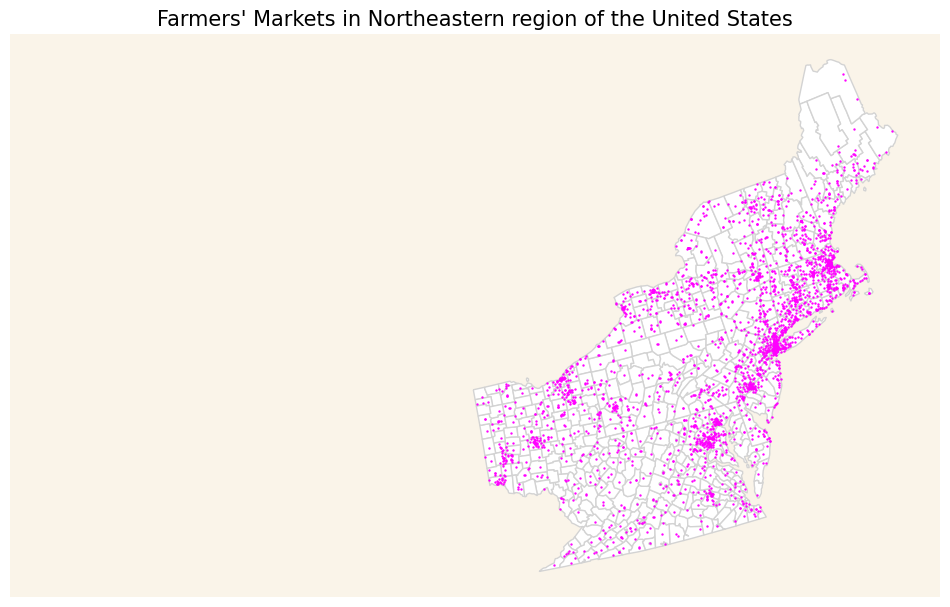

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.patches import Rectangle

# Filter for specific state FIPS codes
state_fips = ['23', '33', '50', '25', '44', '09', '36', '42', '34', '10', '24', '51', '54', '39']
filtered_gdf = gdf_main[gdf_main['STATEFP'].isin(state_fips)]

# Convert df to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, geometry=[Point(xy) for xy in zip(df.x, df.y)],
    crs='EPSG:4326'  # assuming your points are in WGS84 latitude/longitude
).to_crs(epsg=2163)

# Perform spatial join to retain only points within the selected counties
filtered_points_gdf = gpd.sjoin(gdf_points, filtered_gdf, how='inner', op='within')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Add background color
background_color = '#FAF4E9'
ax.add_patch(Rectangle((0, 0), 1, 1, color=background_color, transform=ax.transAxes, zorder=-1))

# Plot the base map filled with white
filtered_gdf.plot(ax=ax, color='white', edgecolor='lightgrey')  # Plot the base map
filtered_points_gdf.plot(ax=ax, color='magenta', markersize=0.5)  # Plot the filtered points

ax.set_axis_off()
ax.set_title("Farmers' Markets in Northeastern region of the United States", fontsize=15)

plt.show()

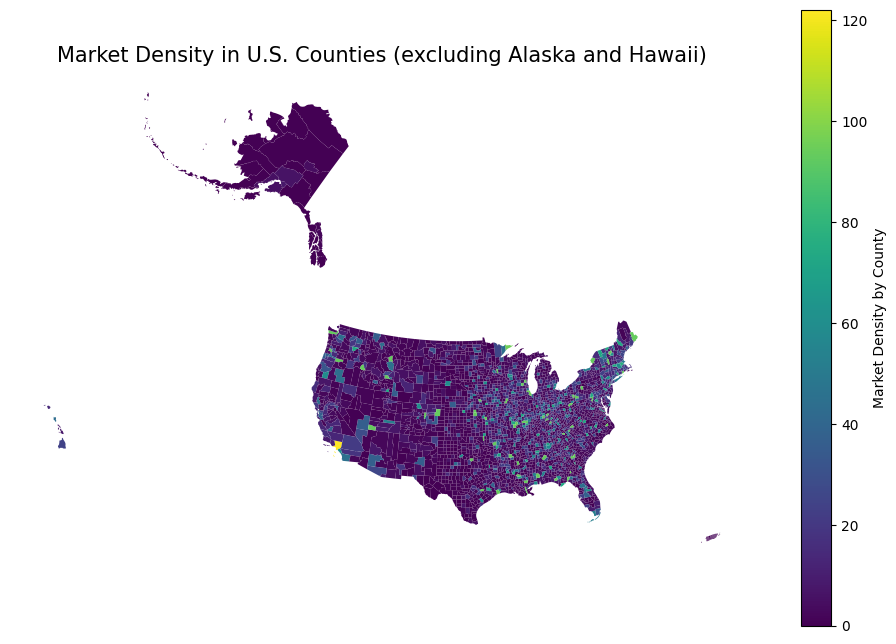

In [17]:
import matplotlib.colors as mcolors

market_count = df['County'].value_counts().reset_index()
market_count.columns = ['County', 'MarketCount']

# Step 3: Merge with GeoDataFrame
# Ensure the 'County' names match between 'gdf_main' and 'market_count' (might need adjustments if not)
gdf_main = gdf_main.merge(market_count, how='left', left_on='NAME', right_on='County')

# Fill NaN values with 0 in case there are counties with no data
gdf_main['MarketCount'] = gdf_main['MarketCount'].fillna(0)

colors = ["#fbaed2", "#ff1493", "#9400d3"]  # Adjusted darker shades of magenta
cmap = mcolors.LinearSegmentedColormap.from_list("magenta_scale_darker", colors)

# Step 4: Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_main.plot(column='MarketCount', ax=ax, cmap='viridis', legend=True,
              legend_kwds={'label': "Market Density by County"})

# Remove axes for a clean look
ax.set_axis_off()

# Set title
ax.set_title('Market Density in U.S. Counties (excluding Alaska and Hawaii)', fontsize=15)

plt.show()


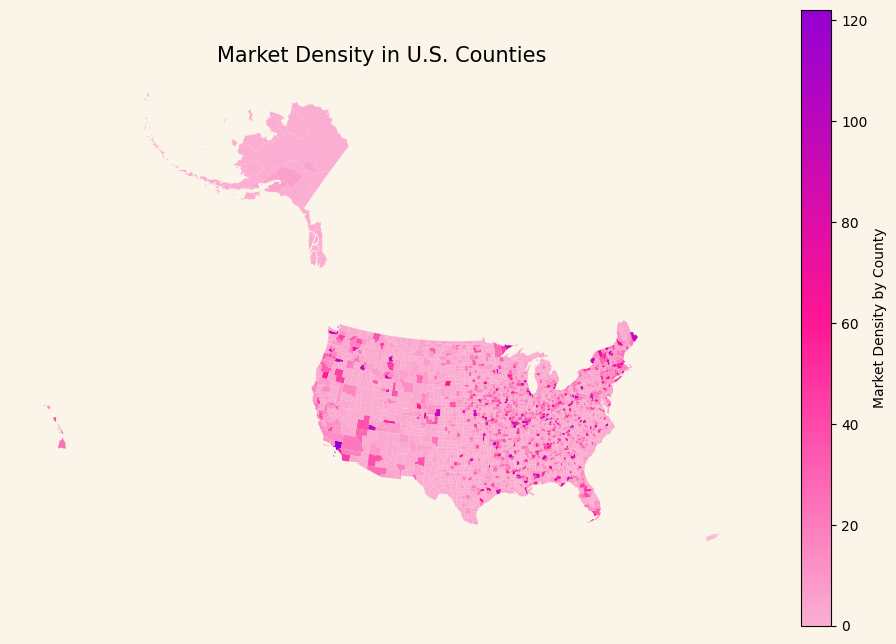

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Create a darker custom colormap from light to dark magenta
colors = ["#fbaed2", "#ff1493", "#9400d3"]  # Adjusted darker shades of magenta
cmap = mcolors.LinearSegmentedColormap.from_list("magenta_scale_darker", colors)

# Step 4: Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fig.patch.set_facecolor('#FAF4E9')  # Set the background color of the figure
ax.set_facecolor('#FAF4E9')  # Set the background color of the axes

gdf_main.plot(column='MarketCount', ax=ax, cmap=cmap, legend=True,
              legend_kwds={'label': "Market Density by County"})

# Remove axes for a clean look
ax.set_axis_off()

# Set title
ax.set_title('Market Density in U.S. Counties', fontsize=15)

plt.show()


# Interactive Map - United States Farmers Market Overview

In [19]:
from pandas import isna
import json
from shapely.geometry import shape
from ipyleaflet import Map, GeoJSON, Marker, AwesomeIcon, basemaps, LayerGroup
from ipywidgets import HTML, Layout, HBox, Label, VBox
from IPython.display import display, HTML as IPHTML

#### Prepare Data

In [20]:
gdf_markets = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.x, df.y),
    crs="EPSG:4326"  # This CRS refers to WGS84 latitude and longitude
)

# Ensure gdf_main is in the same CRS as gdf_markets
gdf_main = gdf_main.to_crs("EPSG:4326")

# Perform spatial join
gdf_joined = gpd.sjoin(gdf_markets, gdf_main, how="left", op='within')

# gdf_joined will now include the 'STATEFP' from gdf_main

# Aggregate county geometries by state
state_boundaries = gdf_main.dissolve(by='STATEFP', as_index=False)

In [21]:
state_names = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California',
    '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia',
    '12': 'Florida', '13': 'Georgia', '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois',
    '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana',
    '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York',
    '37': 'North Carolina', '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon',
    '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina', '46': 'South Dakota',
    '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont', '51': 'Virginia',
    '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}

In [22]:
product_columns = ['Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables', 
        'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu', 'WildHarvested']

#### Adding base layer of map and setting bounds

In [23]:
# Set bounds to limit the map view to the continental USA
bounds = [(24.396308, -125.0), (49.384358, -66.93457)]
bounds = [[(15, -180), (72, -50)]]

# Initialize map with restricted bounds
m = Map(
    center=(37.0902, -95.7129),
    zoom=4,
    basemap=basemaps.OpenStreetMap.Mapnik,
    layout={'height':'500px'},
    min_zoom=4,
    max_bounds=bounds  # This restricts the map panning to within these bounds
)

m.dragging = True
m.scroll_wheel_zoom = False
m.double_click_zoom = False
m.touch_zoom = False
m.box_zoom = False


# Default gray icon
default_icon = AwesomeIcon(name='shopping-basket', marker_color='gray', icon_color='white')

# Pink icon for selected marker
selected_icon = AwesomeIcon(name='shopping-basket', marker_color='pink', icon_color='white')

# Add state boundaries as interactive layers
states_layer = GeoJSON(
    data=json.loads(state_boundaries.to_json()),
    style={'color': 'black', 'fillColor': '#cccccc', 'weight': 1, 'fillOpacity': 0.1},
    hover_style={'fillColor': '#FF56B7', 'fillOpacity': 0.2}
)
m.add_layer(states_layer)

# Create a layer group for markers
marker_group = LayerGroup()
m.add_layer(marker_group)  # Add the marker group to the map

#### HTML parts required for info panel and set the initail info panel content

In [24]:
# Styling
display(IPHTML("""
<style>
    .info-style {
        font-family: 'Arial', sans-serif;
        background-color: #f9f9f9;
        border-radius: 8px;
        padding: 10px;
        border: 1px solid #ccc;
    }
    .info-style ul {
        padding-left: 20px;
        list-style-type: circle;
    }
    .info-style li {
        line-height: 1.6;
    }
    .scrollable {
        height: 500px; /* Same as the map height */
        overflow-y: auto; /* Enable vertical scrolling */
        width: 100%;
    }
</style>
"""))

# Create an information panel
info_panel = HTML()
info_panel.layout = Layout(width='25%', height='500px', overflow_y='scroll')

def format_state_info(state_market_counts):
    # Start the HTML with a custom style for a table-like display
    info_html = """
    <div class='scrollable'>
        <div class='info-style'>
            <h2>Market Counts by State</h2>
            <div style='display: table; width: 100%;'>
    """
    
    # Iterate over each row in the DataFrame to add state and market counts as rows in the HTML table
    for _, row in state_market_counts.iterrows():
        state_name = state_names.get(row['STATEFP'], 'Unknown State')  # Get the state name using STATEFP code
        count = row['counts']  # Retrieve the count of markets from the DataFrame
        
        # Add each state and its market count as a row in the HTML table
        info_html += f"""
        <div style='display: table-row;'>
            <div style='display: table-cell; padding: 8px; border-bottom: 1px solid #ccc;'>
                {state_name}
            </div>
            <div style='display: table-cell; text-align: right; padding: 8px; border-bottom: 1px solid #ccc;'>
                {count}
            </div>
        </div>
        """
    
    # Close the divs for the table and the container
    info_html += "</div></div>"
    return info_html

def format_market_list_html(state_data, state_name):
    # Start the HTML with custom styles for the table-like display
    market_list_html = f"""
    <div class='scrollable'>
        <div class='info-style'>
            <h2>Markets in {state_name}</h2>
            <div style='display: table; width: 100%;'>
    """
    # Add each market as a row in the table
    for _, row in state_data.iterrows():
        market_name = row['MarketName']
        market_list_html += f"""
        <div style='display: table-row;'>
            <div style='display: table-cell; padding: 8px; border-bottom: 1px solid #ccc;'>{market_name}</div>
        </div>
        """
    market_list_html += "</div></div>"
    return market_list_html


# Set initial content for the info panel with state market counts
state_market_counts = gdf_joined['STATEFP'].value_counts().rename_axis('STATEFP').reset_index(name='counts')
info_panel.value = format_state_info(state_market_counts)

#### Update the map dynamically based on selected state and market

In [25]:
def update_info_panel(row):
    details = f"<div class='scrollable'><div class='info-style'><h1> {row['MarketName']}</h1><br>"
    
    # Handle multiple seasons
    seasons_details = ""
    for i in range(1, 5):  # Assuming there are up to four seasons
        date_key = f'Season{i}Date'
        time_key = f'Season{i}Time'
        if date_key in row and not isna(row[date_key]) and time_key in row and not isna(row[time_key]):
            seasons_details += f"<b>Dates:</b> {row[date_key]}<br>"
            seasons_details += f"<b>Times:</b> {row[time_key]}<br><br>"

    if seasons_details:
        details += seasons_details

    # Assuming products are listed as True/False in the DataFrame
    products_list = '<ul>' + ''.join([f"<li>{product}</li>" for product in product_columns if row.get(product) == 'Y']) + '</ul>'
    details += f"<b>Products Available:</b> {products_list}" + "</div>"
    
    info_panel.value = details

def handle_marker_click(marker, row):
    # Reset all markers to the default blue icon
    for mkr in marker_group.layers:
        mkr.icon = default_icon
    
    # Change the clicked marker's icon to red
    marker.icon = selected_icon

    # Update the information panel for the clicked marker
    update_info_panel(row)


def on_state_click(feature, **kwargs):

    # Focus on the selected state and fit the bounds
    state_geom = shape(feature['geometry'])
    m.fit_bounds([(state_geom.bounds[1], state_geom.bounds[0]), (state_geom.bounds[3], state_geom.bounds[2])])

    # Clear existing markers by clearing the layer group
    marker_group.clear_layers()

    # Re-add markers for the new state
    state_fips = feature['properties']['STATEFP']
    state_data = gdf_joined[gdf_joined['STATEFP'] == state_fips]
    state_name = state_names.get(state_fips, 'Unknown State')  # Translate STATEFP to state name
    
    # Prepare HTML content for the info panel listing all markets in the state
    info_panel.value = format_market_list_html(state_data, state_name)  # Set the info panel content

    for _, row in state_data.iterrows():
        marker = Marker(icon=default_icon, location=(row.geometry.y, row.geometry.x), draggable=False)
        marker.on_click(lambda marker=marker, row=row, **kwargs: handle_marker_click(marker, row))
        marker_group.add_layer(marker)  # Add marker to the group instead of directly to the map

states_layer.on_click(on_state_click)


# Layout the map and the information panel side by side
panel = HBox([m, info_panel])
panel.layout = Layout(display='flex', flex_flow='row', height='500px')

# Create a label for the map title
map_title = Label('United States Farmers Market Overview')
map_title.layout = Layout(width='100%', height='30px', align_items='center', justify_content='center')

# Assemble the title and the map into a vertical box layout
panel = VBox([map_title, panel])  # 'panel' is your map and info panel side by side

panel

# Interactive Map - Trend in United States Farmers Market

In [26]:
import geopandas as gpd
import json
from ipyleaflet import Map, GeoJSON, CircleMarker, LayerGroup, basemaps
from ipywidgets import VBox, HBox, HTML, Layout, widgets
from datetime import datetime

### Prepare the Data

In [27]:
def get_months_from_date_range(date_range):
    if isinstance(date_range, str):  # Check if the date_range is a string
        try:
            start_date, end_date = date_range.split(' to ')
            start_month = datetime.strptime(start_date.strip(), '%m/%d/%Y').month
            end_month = datetime.strptime(end_date.strip(), '%m/%d/%Y').month
            if start_month <= end_month:
                return list(range(start_month, end_month + 1))
            else:
                return list(range(start_month, 13)) + list(range(1, end_month + 1))
        except ValueError:
            return []
    return []  # Return an empty list if not a string


# Function to parse dates and add active months
def add_months_active(df):
    df['months_active'] = df.apply(lambda row: sorted(set(
        get_months_from_date_range(row.get('Season1Date', '')) +
        get_months_from_date_range(row.get('Season2Date', '')) +
        get_months_from_date_range(row.get('Season3Date', '')) +
        get_months_from_date_range(row.get('Season4Date', ''))
    )), axis=1)
    return df


df = add_months_active(df)
gdf_markets = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326")

### Initialize the Map and Info Panel

In [28]:
# Create map
m = Map(center=(37.0902, -95.7129), zoom=4, layout={'height':'500px', 'width': '75%'}, basemaps=basemaps.OpenStreetMap.Mapnik)

marker_group = LayerGroup()
m.add_layer(marker_group)

# Information panel
info_panel = HTML(layout=Layout(height='500px', width='25%'))

### Create and update Slider and Information Panel Dynamically

In [29]:
# Function to generate the HTML for the information panel
def format_info_panel(selected_month, state_data):
    month_name = month_names[selected_month - 1]
    html_content = "<div class='scrollable'><div class='info-style'><h2>Market Counts by State</h2><h3>Month: " + month_name + "</h3><div style='display: table; width: 100%;'>"
    for state, count in state_data.items():
        html_content += f"""<div style='display: table-row;'><div style='display: table-cell; padding: 8px; border-bottom: 1px solid #ccc;'> {state} 
        </div><div style='display: table-cell; text-align: right; padding: 8px; border-bottom: 1px solid #ccc;'> {count} </div></div>"""
    html_content += "</div></div></div>"
    return html_content

# Update function for the map
def update_map(change):
    marker_group.clear_layers()
    selected_month = change['new']
    selected_month_data = {state: 0 for state in df['State'].unique()}  # Initialize count dictionary
    # Filter markets active in the selected month
    active_markets = gdf_markets[gdf_markets['months_active'].apply(lambda months: selected_month in months)]
    for _, row in active_markets.iterrows():
        state = row['State']
        selected_month_data[state] += 1
        marker = CircleMarker(location=(row.geometry.y, row.geometry.x), radius=1, color='pink', fill_opacity=1)
        marker_group.add_layer(marker)
    info_panel.value = format_info_panel(selected_month, selected_month_data)

# Define the month selection slider
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_slider = widgets.SelectionSlider(
    options=[(name, i + 1) for i, name in enumerate(month_names)],
    value=1,
    description='Month:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

month_slider.observe(update_map, names='value')
update_map({'new': month_slider.value})  # Initial map update

# Layout the widget and map side by side with the information panel
panel = HBox([m, info_panel])
display(VBox([month_slider, panel]))

Observations in data:

- **Seasonal Peaks:** The graph shows clear seasonal patterns, with peaks generally occurring in the middle of the year. This likely corresponds to the warmer months when farmers markets are more prevalent due to better weather conditions and the availability of fresh produce.
- **Yearly Fluctuations:** There is a noticeable fluctuation in the number of active markets from year to year. For example, there are significant spikes around 2014 and 2016, followed by a substantial drop after 2018. This could be influenced by various factors, such as changes in consumer behavior, economic factors, or shifts in agricultural policy.
- **Overall Decline:** Post-2016, there seems to be a general decline in the number of active markets, reaching very low levels by 2020. This decline might need further investigation to understand if it's due to data collection methods, actual decreases in market numbers, or perhaps external impacts such as economic downturns or changes in consumer preferences.
- **High Variability:** The data points exhibit high variability in certain years, indicating months with very high activity and others with significantly less. This could be reflective of specific local events, harvest seasons, or market openings and closings.
- **Data Density:** The red dots, which likely represent the actual data points collected per month, show a dense clustering at lower values and sparse occurrences at higher values. This might indicate that while most months have a moderate number of active markets, very high values are rare but contribute significantly to the peaks observed.
- **Potential Data Gaps or Collection Issues:** The sharp drops, especially noticeable towards the end of the graph (around 2020), could also suggest data gaps or issues with data collection during those periods. If this data includes the period affected by the COVID-19 pandemic, for instance, it would explain a sharp decline due to restrictions on gatherings and public events.

## Trends in Farmers' Markets over a year Across US

In [30]:
from datetime import timedelta

# Helper function to generate date range from a date string
def generate_date_range(date_str):
    if pd.notna(date_str):
        try:
            start_date, end_date = date_str.split(' to ')
            start_date = datetime.strptime(start_date.strip(), '%m/%d/%Y')
            end_date = datetime.strptime(end_date.strip(), '%m/%d/%Y')
            return [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
        except ValueError:
            return []
    return []

seasons = ['Season1Date', 'Season2Date', 'Season3Date', 'Season4Date']

# Applying the date range generation for all seasons and aggregating counts
df['date_range'] = df.apply(lambda row: sum((generate_date_range(row[season]) for season in seasons), []), axis=1)

# Explode the DataFrame by the date_range list to get a row for each date a market is active
df_exploded = df.explode('date_range')

# Group by the date to get the count of markets active on each date
date_counts = df_exploded['date_range'].value_counts().sort_index()

# Resample by month to get monthly data
monthly_counts = date_counts.resample('M').sum()

# Reset index to make the month a column
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['Month', 'MarketCount']


In [31]:
import plotly.express as px

# Plotting using Plotly
fig = px.line(
    monthly_counts_df, 
    x='Month', 
    y='MarketCount', 
    title='Monthly Trend of Active Farmers Markets in the U.S.',
    labels={'Month': 'Month', 'MarketCount': 'Number of Active Farmers Markets'},
    markers=True,
    line_shape='spline'  # This makes the line curved
)

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Active Farmers Markets',
    xaxis=dict(
        tickformat='%b %Y',  # Format the month names properly
        tickangle=45  # Angle the date text for better readability
    ),

    font=dict(
        size=12,
        color="black"
    ),
    hoverlabel=dict(  # Adjust hover label styles here
        bgcolor="#FAF4E9",  # Background color of the hover labels
        font_size=14,  # Font size of the text in the hover labels
        font_family="Rockwell"  # Font of the text in the hover labels
    )
)

# Customize line and marker appearance
fig.update_traces(
    line=dict(width=2, color='gray'),  # Set line color and width
    marker=dict(size=8, color='magenta', line=dict(width=2, color='DarkSlateGrey')),  # Enhance markers
    hoverinfo='all'  # Ensure all necessary info is shown on hover
)

fig.update_layout(autosize=True)

# Show the figure
fig.show()